In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency

In [11]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind


In [2]:
df=pd.read_csv("BankChurners_edited.csv")

In [3]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<Axes: ylabel='Density'>

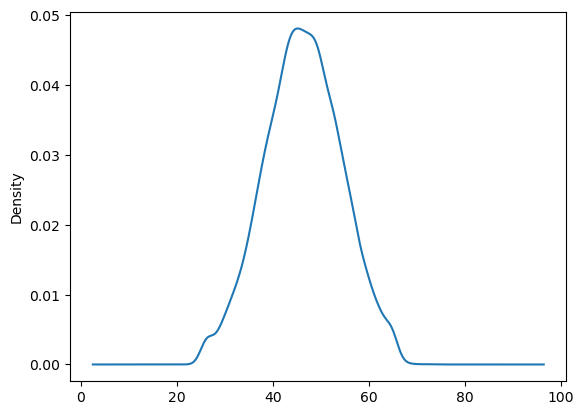

In [4]:
df.Customer_Age.plot(kind="kde")

<Axes: xlabel='Customer_Age', ylabel='Density'>

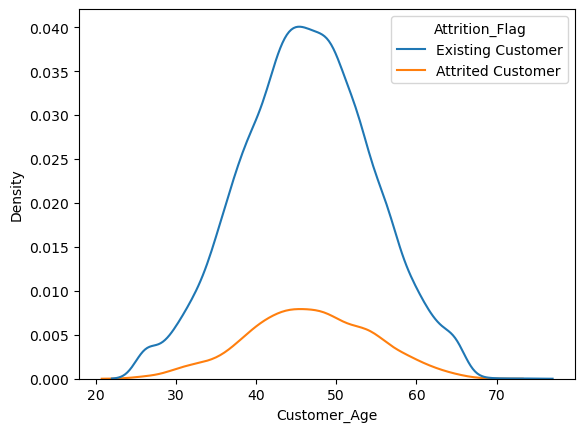

In [6]:
sns.kdeplot(df,x="Customer_Age",hue="Attrition_Flag")

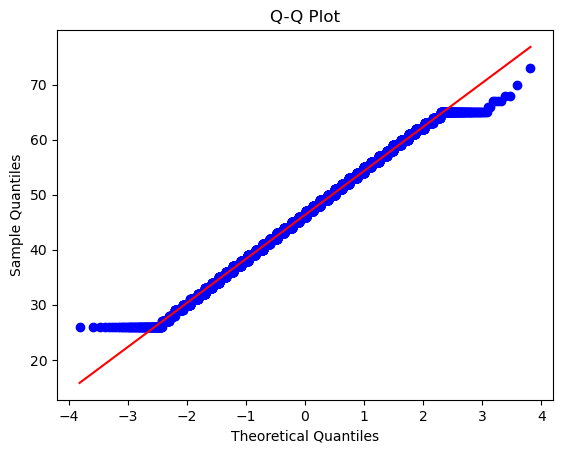

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sample data (replace this with your variable's data)
data = df.Customer_Age

# Generate a Q-Q plot
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()


In [9]:
from scipy import stats

# Split data into groups
attrited_age = df[df['Attrition_Flag'] == 'Attrited Customer']['Customer_Age']
existing_age = df[df['Attrition_Flag'] == 'Existing Customer']['Customer_Age']

# Perform normality tests
attrited_normality = stats.normaltest(attrited_age)
existing_normality = stats.normaltest(existing_age)

print("Attrited Customers Normality Test:", attrited_normality)
print("Existing Customers Normality Test:", existing_normality)


Attrited Customers Normality Test: NormaltestResult(statistic=9.55567462411545, pvalue=0.008414176542347756)
Existing Customers Normality Test: NormaltestResult(statistic=41.75288321621823, pvalue=8.579789006078366e-10)


In [19]:
attrited_age = df[df['Attrition_Flag'] == 'Attrited Customer']['Avg_Open_To_Buy']
existing_age = df[df['Attrition_Flag'] == 'Existing Customer']['Avg_Open_To_Buy']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(attrited_age, existing_age)

# Print the test results
print("Mann-Whitney U test statistic:", statistic)
print("Mann-Whitney U test p-value:", p_value)

Mann-Whitney U test statistic: 7213717.0
Mann-Whitney U test p-value: 0.005652366314054008
